## MY ASSESMENT TOPIC:
### Analysis of the Increase or Decrease in the Construction Producer Prices According to the Number of Employment and Building Permits on a Yearly Basis considering IE, UK, TR, and EU.

## First Dataset 
### Building Permits - Annual Data BY EUROSTAT

In [1]:
# 2023034 - MAHMUT ZAHID MALKOC
import numpy as np
import pandas as pd
from pyjstat import pyjstat

# Building permits - m2 of useful floor area - Index, 2015=100
BuildingsPermits = pd.read_csv('BuildingsPermits.csv')
BuildingsPermits

,DATAFLOW,LAST UPDATE,freq,indic_bt,cpa2_1,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE
0,ESTAT:STS_COBP_A(1.0),13/05/2023 11:00,Annual,Building permits - m2 of useful floor area,Buildings,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",Albania,1992,NaN
1,ESTAT:STS_COBP_A(1.0),13/05/2023 11:00,Annual,Building permits - m2 of useful floor area,Buildings,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",Albania,1993,NaN
2,ESTAT:STS_COBP_A(1.0),13/05/2023 11:00,Annual,Building permits - m2 of useful floor area,Buildings,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",Albania,1994,NaN
3,ESTAT:STS_COBP_A(1.0),13/05/2023 11:00,Annual,Building permits - m2 of useful floor area,Buildings,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",Albania,1995,NaN
4,ESTAT:STS_COBP_A(1.0),13/05/2023 11:00,Annual,Building permits - m2 of useful floor area,Buildings,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",Albania,1996,NaN
...,...,...,...,...,...,...,...,...,...,...
1173,ESTAT:STS_COBP_A(1.0),13/05/2023 11:00,Annual,Building permits - m2 of useful floor area,Buildings,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",United Kingdom,2018,103.5
1174,ESTAT:STS_COBP_A(1.0),13/05/2023 11:00,Annual,Building permits - m2 of useful floor area,Buildings,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",United Kingdom,2019,96.5
1175,ESTAT:STS_COBP_A(1.0),13/05/2023 11:00,Annual,Building permits - m2 of useful floor area,Buildings,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",United Kingdom,2020,NaN
1176,ESTAT:STS_COBP_A(1.0),13/05/2023 11:00,Annual,Building permits - m2 of useful floor area,Buildings,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",United Kingdom,2021,NaN


In [2]:
# 2023034 - MAHMUT ZAHID MALKOC
# "geo", "TIME_PERIOD" and "OBS_VALUE" are choosen
BuildingsPermits = BuildingsPermits[['geo', 'TIME_PERIOD', 'OBS_VALUE']]
BuildingsPermits

,geo,TIME_PERIOD,OBS_VALUE
0,Albania,1992,NaN
1,Albania,1993,NaN
2,Albania,1994,NaN
3,Albania,1995,NaN
4,Albania,1996,NaN
...,...,...,...
1173,United Kingdom,2018,103.5
1174,United Kingdom,2019,96.5
1175,United Kingdom,2020,NaN
1176,United Kingdom,2021,NaN


In [3]:
# 2023034 - MAHMUT ZAHID MALKOC
# Column names are changed
BuildingsPermits = BuildingsPermits.rename(columns={'geo': 'Country', 'TIME_PERIOD': 'Year', 'OBS_VALUE': 'Value'})
BuildingsPermits

,Country,Year,Value
0,Albania,1992,NaN
1,Albania,1993,NaN
2,Albania,1994,NaN
3,Albania,1995,NaN
4,Albania,1996,NaN
...,...,...,...
1173,United Kingdom,2018,103.5
1174,United Kingdom,2019,96.5
1175,United Kingdom,2020,NaN
1176,United Kingdom,2021,NaN


In [4]:
# 2023034 - MAHMUT ZAHID MALKOC
# Choosen the all countries
countries = BuildingsPermits['Country'].unique()
list(countries)

['Albania',
 'Austria',
 'Bosnia and Herzegovina',
 'Belgium',
 'Bulgaria',
 'Cyprus',
 'Czechia',
 'Germany (until 1990 former territory of the FRG)',
 'Denmark',
 'Euro area - 19 countries  (2015-2022)',
 'Euro area – 20 countries (from 2023)',
 'Estonia',
 'Greece',
 'Spain',
 'European Union - 27 countries (from 2020)',
 'Finland',
 'France',
 'Croatia',
 'Hungary',
 'Ireland',
 'Italy',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Montenegro',
 'North Macedonia',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Sweden',
 'Slovenia',
 'Slovakia',
 'Türkiye',
 'United Kingdom']

In [5]:
# 2023034 - MAHMUT ZAHID MALKOC
# Related Countries are selected
countries = ['European Union - 27 countries (from 2020)','Ireland','United Kingdom','Türkiye']
BuildingsPermits = BuildingsPermits[BuildingsPermits['Country'].isin(countries)]
BuildingsPermits

,Country,Year,Value
434,European Union - 27 countries (from 2020),1992,NaN
435,European Union - 27 countries (from 2020),1993,NaN
436,European Union - 27 countries (from 2020),1994,NaN
437,European Union - 27 countries (from 2020),1995,NaN
438,European Union - 27 countries (from 2020),1996,NaN
...,...,...,...
1173,United Kingdom,2018,103.5
1174,United Kingdom,2019,96.5
1175,United Kingdom,2020,NaN
1176,United Kingdom,2021,NaN


In [6]:
# 2023034 - MAHMUT ZAHID MALKOC
# How many countries do we have?
unique_countries = BuildingsPermits['Country'].unique()
num_countries = len(unique_countries)
num_countries

4

In [7]:
# 2023034 - MAHMUT ZAHID MALKOC
# Values in European Union by years
BP_data = BuildingsPermits[BuildingsPermits['Country'] == 'European Union - 27 countries (from 2020)']
BP_data = BP_data[['Year', 'Value']].set_index('Year').rename(columns={'Value': 'European Union'})
BP_data

,European Union
Year,
1992,NaN
1993,NaN
1994,NaN
1995,NaN
1996,NaN
1997,NaN
1998,NaN
1999,NaN
2000,NaN


In [8]:
# 2023034 - MAHMUT ZAHID MALKOC
for country in countries:
    if country == 'European Union - 27 countries (from 2020)':
        continue
    country_data = BuildingsPermits[BuildingsPermits['Country'] == country][['Year', 'Value']].set_index('Year').rename(columns={'Value': country})
    BP_data = BP_data.merge(country_data, how='outer', left_index=True, right_index=True)
BP_data

,European Union,Ireland,United Kingdom,Türkiye
Year,,,,
1992,NaN,NaN,NaN,42.6
1993,NaN,NaN,NaN,49.6
1994,NaN,NaN,NaN,47.6
1995,NaN,NaN,NaN,49.0
1996,NaN,NaN,NaN,45.9
1997,NaN,NaN,NaN,48.8
1998,NaN,NaN,118.9,46.1
1999,NaN,NaN,116.6,36.8
2000,NaN,394.0,114.1,36.1


In [9]:
# 2023034 - MAHMUT ZAHID MALKOC
BuildingsPermits = BP_data.rename(columns={"European Union": "EU",
                                            "Ireland": "IE",
                                            "United Kingdom": "UK",
                                            "Türkiye": "TR",})
BuildingsPermits

,EU,IE,UK,TR
Year,,,,
1992,NaN,NaN,NaN,42.6
1993,NaN,NaN,NaN,49.6
1994,NaN,NaN,NaN,47.6
1995,NaN,NaN,NaN,49.0
1996,NaN,NaN,NaN,45.9
1997,NaN,NaN,NaN,48.8
1998,NaN,NaN,118.9,46.1
1999,NaN,NaN,116.6,36.8
2000,NaN,394.0,114.1,36.1


In [10]:
# 2023034 - MAHMUT ZAHID MALKOC
BuildingsPermits.reset_index(inplace=True)
BuildingsPermits

,Year,EU,IE,UK,TR
0,1992,NaN,NaN,NaN,42.6
1,1993,NaN,NaN,NaN,49.6
2,1994,NaN,NaN,NaN,47.6
3,1995,NaN,NaN,NaN,49.0
4,1996,NaN,NaN,NaN,45.9
5,1997,NaN,NaN,NaN,48.8
6,1998,NaN,NaN,118.9,46.1
7,1999,NaN,NaN,116.6,36.8
8,2000,NaN,394.0,114.1,36.1
9,2001,NaN,365.0,115.7,33.8


In [11]:
# 2023034 - MAHMUT ZAHID MALKOC
BuildingsPermits = BuildingsPermits.add_prefix('BP_')
BuildingsPermits = BuildingsPermits.rename(columns={"BP_Year": "Year"})
BuildingsPermits

,Year,BP_EU,BP_IE,BP_UK,BP_TR
0,1992,NaN,NaN,NaN,42.6
1,1993,NaN,NaN,NaN,49.6
2,1994,NaN,NaN,NaN,47.6
3,1995,NaN,NaN,NaN,49.0
4,1996,NaN,NaN,NaN,45.9
5,1997,NaN,NaN,NaN,48.8
6,1998,NaN,NaN,118.9,46.1
7,1999,NaN,NaN,116.6,36.8
8,2000,NaN,394.0,114.1,36.1
9,2001,NaN,365.0,115.7,33.8


## Second Dataset
### Labour Input In Construction - Employment Number of Persons - Annual Data BY EUROSTAT

In [12]:
# 2023034 - MAHMUT ZAHID MALKOC
import numpy as np
import pandas as pd

EmploymentNumberOfPersons = pd.read_excel('LabourInputInConstruction-EmploymentNumberOfPersons.xlsx')
EmploymentNumberOfPersons

,GEO (Labels),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,European Union - 27 countries (from 2020),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.8,100.7,100,100.7,102.8,106.4,109.6,110.4,113.0,115.7
1,European Union - 28 countries (2013-2020),NaN,NaN,NaN,NaN,NaN,NaN,104.5,107.0,111.6,...,101.7,100.2,100,100.9,103.3,106.3,109.1,NaN,NaN,NaN
2,Euro area – 20 countries (from 2023),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.7,100.8,100,100.5,102.6,105.9,108.5,109.2,112.4,115.3
3,Euro area - 19 countries (2015-2022),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.2,...,102.7,100.8,100,100.5,102.6,105.9,108.4,109.0,112.2,115.1
4,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,100.6,100,101.4,103.6,106.4,109.2,108.0,112.6,NaN
5,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.9,101.8,100,95.8,99.4,100.2,103.2,101.5,93.5,90.2
6,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.9,98.2,100,97.3,98.6,100.0,101.8,102.3,98.0,96.7
7,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.3,96.8,100,103.9,107.8,112.1,114.2,117.7,122.9,126.8
8,Germany (until 1990 former territory of the FRG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.8,100.2,100,101.4,103.7,105.8,107.7,109.1,110.7,111.5
9,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.9,...,96.7,93.8,100,98.8,105.1,110.4,114.3,108.5,114.9,121.1


In [13]:
# 2023034 - MAHMUT ZAHID MALKOC
EmploymentNumberOfPersons.set_index('GEO (Labels)', inplace = True)
EmploymentNumberOfPersons

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
GEO (Labels),,,,,,,,,,,,,,,,,,,,,
European Union - 27 countries (from 2020),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.8,100.7,100,100.7,102.8,106.4,109.6,110.4,113.0,115.7
European Union - 28 countries (2013-2020),NaN,NaN,NaN,NaN,NaN,NaN,104.5,107.0,111.6,112.6,...,101.7,100.2,100,100.9,103.3,106.3,109.1,NaN,NaN,NaN
Euro area – 20 countries (from 2023),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.7,100.8,100,100.5,102.6,105.9,108.5,109.2,112.4,115.3
Euro area - 19 countries (2015-2022),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.2,118.7,...,102.7,100.8,100,100.5,102.6,105.9,108.4,109.0,112.2,115.1
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,100.6,100,101.4,103.6,106.4,109.2,108.0,112.6,NaN
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.9,101.8,100,95.8,99.4,100.2,103.2,101.5,93.5,90.2
Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.9,98.2,100,97.3,98.6,100.0,101.8,102.3,98.0,96.7
Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.3,96.8,100,103.9,107.8,112.1,114.2,117.7,122.9,126.8
Germany (until 1990 former territory of the FRG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.8,100.2,100,101.4,103.7,105.8,107.7,109.1,110.7,111.5


In [14]:
# 2023034 - MAHMUT ZAHID MALKOC
EmploymentNumberOfPersons = EmploymentNumberOfPersons.T
EmploymentNumberOfPersons

GEO (Labels),European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Euro area – 20 countries (from 2023),Euro area - 19 countries (2015-2022),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,...,Sweden,Iceland,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Türkiye
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,104.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.6,NaN,NaN,NaN,NaN,NaN
1997,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN
1998,NaN,111.6,NaN,118.2,NaN,NaN,NaN,NaN,NaN,78.9,...,NaN,NaN,NaN,84.6,94.4,NaN,NaN,NaN,NaN,NaN
1999,NaN,112.6,NaN,118.7,NaN,NaN,NaN,NaN,NaN,74.7,...,NaN,NaN,NaN,83.6,95.9,NaN,NaN,NaN,NaN,NaN


In [15]:
# 2023034 - MAHMUT ZAHID MALKOC
EmploymentNumberOfPersons = EmploymentNumberOfPersons.reset_index()
EmploymentNumberOfPersons

GEO (Labels),index,European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Euro area – 20 countries (from 2023),Euro area - 19 countries (2015-2022),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),...,Sweden,Iceland,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Türkiye
0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1996,NaN,104.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.6,NaN,NaN,NaN,NaN,NaN
7,1997,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN
8,1998,NaN,111.6,NaN,118.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,84.6,94.4,NaN,NaN,NaN,NaN,NaN
9,1999,NaN,112.6,NaN,118.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.6,95.9,NaN,NaN,NaN,NaN,NaN


In [16]:
# 2023034 - MAHMUT ZAHID MALKOC
EmploymentNumberOfPersons = EmploymentNumberOfPersons.rename(columns={"index": "Year"})
EmploymentNumberOfPersons

GEO (Labels),Year,European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Euro area – 20 countries (from 2023),Euro area - 19 countries (2015-2022),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),...,Sweden,Iceland,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Türkiye
0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1996,NaN,104.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.6,NaN,NaN,NaN,NaN,NaN
7,1997,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN
8,1998,NaN,111.6,NaN,118.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,84.6,94.4,NaN,NaN,NaN,NaN,NaN
9,1999,NaN,112.6,NaN,118.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.6,95.9,NaN,NaN,NaN,NaN,NaN


In [17]:
# 2023034 - MAHMUT ZAHID MALKOC
EmploymentNumberOfPersons.set_index('Year', inplace = True)
EmploymentNumberOfPersons

GEO (Labels),European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Euro area – 20 countries (from 2023),Euro area - 19 countries (2015-2022),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,...,Sweden,Iceland,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Türkiye
Year,,,,,,,,,,,,,,,,,,,,,
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,104.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.6,NaN,NaN,NaN,NaN,NaN
1997,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN
1998,NaN,111.6,NaN,118.2,NaN,NaN,NaN,NaN,NaN,78.9,...,NaN,NaN,NaN,84.6,94.4,NaN,NaN,NaN,NaN,NaN


In [18]:
# 2023034 - MAHMUT ZAHID MALKOC
EmploymentNumberOfPersons = EmploymentNumberOfPersons[['European Union - 27 countries (from 2020)', 'Ireland', 'United Kingdom','Türkiye']]
EmploymentNumberOfPersons

GEO (Labels),European Union - 27 countries (from 2020),Ireland,United Kingdom,Türkiye
Year,,,,
1990,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN
1996,NaN,NaN,78.6,NaN
1997,NaN,NaN,86.0,NaN
1998,NaN,NaN,94.4,NaN


In [19]:
# 2023034 - MAHMUT ZAHID MALKOC
EmploymentNumberOfPersons = EmploymentNumberOfPersons.rename(columns={"European Union - 27 countries (from 2020)": "EU",
                                                                        "Ireland": "IE",
                                                                        "United Kingdom": "UK",
                                                                        "Türkiye": "TR",})
EmploymentNumberOfPersons

GEO (Labels),EU,IE,UK,TR
Year,,,,
1990,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN
1996,NaN,NaN,78.6,NaN
1997,NaN,NaN,86.0,NaN
1998,NaN,NaN,94.4,NaN


In [20]:
# 2023034 - MAHMUT ZAHID MALKOC
EmploymentNumberOfPersons = EmploymentNumberOfPersons.reset_index()
EmploymentNumberOfPersons

GEO (Labels),Year,EU,IE,UK,TR
0,1990,NaN,NaN,NaN,NaN
1,1991,NaN,NaN,NaN,NaN
2,1992,NaN,NaN,NaN,NaN
3,1993,NaN,NaN,NaN,NaN
4,1994,NaN,NaN,NaN,NaN
5,1995,NaN,NaN,NaN,NaN
6,1996,NaN,NaN,78.6,NaN
7,1997,NaN,NaN,86.0,NaN
8,1998,NaN,NaN,94.4,NaN
9,1999,NaN,NaN,95.9,NaN


In [21]:
# 2023034 - MAHMUT ZAHID MALKOC
ENOP_list = EmploymentNumberOfPersons.values.tolist()
ENOP_list

[['1990', nan, nan, nan, nan],
 ['1991', nan, nan, nan, nan],
 ['1992', nan, nan, nan, nan],
 ['1993', nan, nan, nan, nan],
 ['1994', nan, nan, nan, nan],
 ['1995', nan, nan, nan, nan],
 ['1996', nan, nan, 78.6, nan],
 ['1997', nan, nan, 86.0, nan],
 ['1998', nan, nan, 94.4, nan],
 ['1999', nan, nan, 95.9, nan],
 ['2000', 117.5, 120.1, 99.3, nan],
 ['2001', 117.2, 129.3, 100.2, nan],
 ['2002', 115.8, 131.7, 98.8, nan],
 ['2003', 115.0, 137.2, 99.0, nan],
 ['2004', 115.3, 151.1, 101.5, nan],
 ['2005', 118.3, 174.0, 105.8, 138.4],
 ['2006', 122.5, 192.1, 110.0, 159.5],
 ['2007', 128.3, 199.6, 110.5, 160.0],
 ['2008', 128.4, 182.5, 110.4, 151.4],
 ['2009', 119.5, 124.8, 107.0, 49.4],
 ['2010', 113.9, 89.1, 96.5, 58.2],
 ['2011', 111.3, 82.1, 94.3, 70.4],
 ['2012', 107.7, 76.0, 92.9, 81.4],
 ['2013', 102.8, 76.3, 93.0, 88.7],
 ['2014', 100.7, 85.2, 96.4, 94.0],
 ['2015', 100.0, 100.0, 100.0, 100.0],
 ['2016', 100.7, 114.2, 102.7, 104.4],
 ['2017', 102.8, 123.6, 108.4, 108.8],
 ['2018', 106

In [22]:
# 2023034 - MAHMUT ZAHID MALKOC
columns = ['Year', 'EU', 'IE', 'UK', 'TR']
EmploymentNumberOfPersons = pd.DataFrame(ENOP_list, columns=columns)
EmploymentNumberOfPersons

,Year,EU,IE,UK,TR
0,1990,NaN,NaN,NaN,NaN
1,1991,NaN,NaN,NaN,NaN
2,1992,NaN,NaN,NaN,NaN
3,1993,NaN,NaN,NaN,NaN
4,1994,NaN,NaN,NaN,NaN
5,1995,NaN,NaN,NaN,NaN
6,1996,NaN,NaN,78.6,NaN
7,1997,NaN,NaN,86.0,NaN
8,1998,NaN,NaN,94.4,NaN
9,1999,NaN,NaN,95.9,NaN


In [23]:
# 2023034 - MAHMUT ZAHID MALKOC
EmploymentNumberOfPersons = EmploymentNumberOfPersons.add_prefix('ENOP_')
EmploymentNumberOfPersons = EmploymentNumberOfPersons.rename(columns={"ENOP_Year": "Year"})
EmploymentNumberOfPersons

,Year,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR
0,1990,NaN,NaN,NaN,NaN
1,1991,NaN,NaN,NaN,NaN
2,1992,NaN,NaN,NaN,NaN
3,1993,NaN,NaN,NaN,NaN
4,1994,NaN,NaN,NaN,NaN
5,1995,NaN,NaN,NaN,NaN
6,1996,NaN,NaN,78.6,NaN
7,1997,NaN,NaN,86.0,NaN
8,1998,NaN,NaN,94.4,NaN
9,1999,NaN,NaN,95.9,NaN


In [24]:
# 2023034 - MAHMUT ZAHID MALKOC
# The Raws are deleted if All Countries have NaN Values
rows_deleted = True
while rows_deleted:
    rows_deleted = False
    for index, row in EmploymentNumberOfPersons.iterrows():
        if row[['ENOP_EU', 'ENOP_IE', 'ENOP_UK', 'ENOP_TR']].isna().all():
            EmploymentNumberOfPersons.drop(index, inplace=True)
            rows_deleted = True
            break

EmploymentNumberOfPersons

,Year,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR
6,1996,NaN,NaN,78.6,NaN
7,1997,NaN,NaN,86.0,NaN
8,1998,NaN,NaN,94.4,NaN
9,1999,NaN,NaN,95.9,NaN
10,2000,117.5,120.1,99.3,NaN
11,2001,117.2,129.3,100.2,NaN
12,2002,115.8,131.7,98.8,NaN
13,2003,115.0,137.2,99.0,NaN
14,2004,115.3,151.1,101.5,NaN
15,2005,118.3,174.0,105.8,138.4


## Third Dataset
### Construction Producer Prices or Costs, New Residential Buildings - Annual Data BY EUROSTAT

In [25]:
# 2023034 - MAHMUT ZAHID MALKOC
from pyjstat import pyjstat
from pandas import json_normalize 
import requests

ConstructionProducePrice_URL = 'https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/STS_COPI_A?format=JSON&lang=en&freq=A&indic_bt=CSTO&cpa2_1=CPA_F41001_X_410014&s_adj=NSA&unit=I15&geo=EU27_2020&geo=EA20&geo=EA19&geo=BE&geo=BG&geo=CZ&geo=DK&geo=DE&geo=EE&geo=IE&geo=EL&geo=ES&geo=FR&geo=HR&geo=IT&geo=CY&geo=LV&geo=LT&geo=LU&geo=HU&geo=MT&geo=NL&geo=AT&geo=PL&geo=PT&geo=RO&geo=SI&geo=SK&geo=FI&geo=SE&geo=NO&geo=CH&geo=UK&geo=BA&geo=ME&geo=MK&geo=AL&geo=TR&time=1990&time=1991&time=1992&time=1993&time=1994&time=1995&time=1996&time=1997&time=1998&time=1999&time=2000&time=2001&time=2002&time=2003&time=2004&time=2005&time=2006&time=2007&time=2008&time=2009&time=2010&time=2011&time=2012&time=2013&time=2014&time=2015&time=2016&time=2017&time=2018&time=2019&time=2020&time=2021&time=2022'

# read from json-stat
dataset = pyjstat.Dataset.read(ConstructionProducePrice_URL)

# write to dataframe
ConstructionProducePrice = dataset.write('dataframe')

# read from dataframe
dataset_from_ConstructionProducePrice = pyjstat.Dataset.read(ConstructionProducePrice)

ConstructionProducePrice

,Time frequency,Business trend indicator,Statistical Classification of Products by Activity (CPA 2.1),Seasonal adjustment,Unit of measure,Geopolitical entity (reporting),Time,value
0,Annual,Output price index in construction - in nation...,"Residential buildings, except residences for c...",Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",European Union - 27 countries (from 2020),1990,NaN
1,Annual,Output price index in construction - in nation...,"Residential buildings, except residences for c...",Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",European Union - 27 countries (from 2020),1991,NaN
2,Annual,Output price index in construction - in nation...,"Residential buildings, except residences for c...",Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",European Union - 27 countries (from 2020),1992,NaN
3,Annual,Output price index in construction - in nation...,"Residential buildings, except residences for c...",Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",European Union - 27 countries (from 2020),1993,NaN
4,Annual,Output price index in construction - in nation...,"Residential buildings, except residences for c...",Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",European Union - 27 countries (from 2020),1994,NaN
...,...,...,...,...,...,...,...,...
1249,Annual,Output price index in construction - in nation...,"Residential buildings, except residences for c...",Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",Türkiye,2018,161.4
1250,Annual,Output price index in construction - in nation...,"Residential buildings, except residences for c...",Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",Türkiye,2019,190.3
1251,Annual,Output price index in construction - in nation...,"Residential buildings, except residences for c...",Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",Türkiye,2020,214.8
1252,Annual,Output price index in construction - in nation...,"Residential buildings, except residences for c...",Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",Türkiye,2021,302.2


In [26]:
# 2023034 - MAHMUT ZAHID MALKOC
# "geo", "TIME_PERIOD" and "OBS_VALUE" are choosen
ConstructionProducePrice = ConstructionProducePrice[['Geopolitical entity (reporting)', 'Time', 'value']]

# Seçilen sütunları ekrana yazdır
ConstructionProducePrice

,Geopolitical entity (reporting),Time,value
0,European Union - 27 countries (from 2020),1990,NaN
1,European Union - 27 countries (from 2020),1991,NaN
2,European Union - 27 countries (from 2020),1992,NaN
3,European Union - 27 countries (from 2020),1993,NaN
4,European Union - 27 countries (from 2020),1994,NaN
...,...,...,...
1249,Türkiye,2018,161.4
1250,Türkiye,2019,190.3
1251,Türkiye,2020,214.8
1252,Türkiye,2021,302.2


In [27]:
# 2023034 - MAHMUT ZAHID MALKOC
# column names are changed
ConstructionProducePrice = ConstructionProducePrice.rename(columns={'Geopolitical entity (reporting)': 'Country', 'Time': 'Year', 'value': 'Value'})
ConstructionProducePrice

,Country,Year,Value
0,European Union - 27 countries (from 2020),1990,NaN
1,European Union - 27 countries (from 2020),1991,NaN
2,European Union - 27 countries (from 2020),1992,NaN
3,European Union - 27 countries (from 2020),1993,NaN
4,European Union - 27 countries (from 2020),1994,NaN
...,...,...,...
1249,Türkiye,2018,161.4
1250,Türkiye,2019,190.3
1251,Türkiye,2020,214.8
1252,Türkiye,2021,302.2


In [28]:
# 2023034 - MAHMUT ZAHID MALKOC
countries = ['European Union - 27 countries (from 2020)','Ireland','United Kingdom','Türkiye']
ConstructionProducePrice = ConstructionProducePrice[ConstructionProducePrice['Country'].isin(countries)]
ConstructionProducePrice

,Country,Year,Value
0,European Union - 27 countries (from 2020),1990,NaN
1,European Union - 27 countries (from 2020),1991,NaN
2,European Union - 27 countries (from 2020),1992,NaN
3,European Union - 27 countries (from 2020),1993,NaN
4,European Union - 27 countries (from 2020),1994,NaN
...,...,...,...
1249,Türkiye,2018,161.4
1250,Türkiye,2019,190.3
1251,Türkiye,2020,214.8
1252,Türkiye,2021,302.2


In [29]:
# 2023034 - MAHMUT ZAHID MALKOC
CPP_list = ConstructionProducePrice.values.tolist()
CPP_list

[['European Union - 27 countries (from 2020)', '1990', nan],
 ['European Union - 27 countries (from 2020)', '1991', nan],
 ['European Union - 27 countries (from 2020)', '1992', nan],
 ['European Union - 27 countries (from 2020)', '1993', nan],
 ['European Union - 27 countries (from 2020)', '1994', nan],
 ['European Union - 27 countries (from 2020)', '1995', 69.6],
 ['European Union - 27 countries (from 2020)', '1996', 70.4],
 ['European Union - 27 countries (from 2020)', '1997', 71.2],
 ['European Union - 27 countries (from 2020)', '1998', 71.6],
 ['European Union - 27 countries (from 2020)', '1999', 72.1],
 ['European Union - 27 countries (from 2020)', '2000', 73.5],
 ['European Union - 27 countries (from 2020)', '2001', 75.2],
 ['European Union - 27 countries (from 2020)', '2002', 76.4],
 ['European Union - 27 countries (from 2020)', '2003', 77.7],
 ['European Union - 27 countries (from 2020)', '2004', 80.4],
 ['European Union - 27 countries (from 2020)', '2005', 82.5],
 ['European U

In [30]:
# 2023034 - MAHMUT ZAHID MALKOC
# Values in European Union by years
CPP_data = ConstructionProducePrice[ConstructionProducePrice['Country'] == 'European Union - 27 countries (from 2020)']
CPP_data = CPP_data[['Year', 'Value']].set_index('Year').rename(columns={'Value': 'European Union'})
CPP_data

,European Union
Year,
1990,NaN
1991,NaN
1992,NaN
1993,NaN
1994,NaN
1995,69.6
1996,70.4
1997,71.2
1998,71.6


In [31]:
# 2023034 - MAHMUT ZAHID MALKOC
for country in countries:
    if country == 'European Union - 27 countries (from 2020)':
        continue
    FourCountry_data = ConstructionProducePrice[ConstructionProducePrice['Country'] == country][['Year', 'Value']].set_index('Year').rename(columns={'Value': country})
    CPP_data = CPP_data.merge(FourCountry_data, how='outer', left_index=True, right_index=True)
CPP_data

,European Union,Ireland,United Kingdom,Türkiye
Year,,,,
1990,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN
1993,NaN,NaN,39.1,NaN
1994,NaN,NaN,41.6,NaN
1995,69.6,NaN,42.5,NaN
1996,70.4,NaN,43.1,NaN
1997,71.2,NaN,45.6,NaN
1998,71.6,NaN,48.5,NaN


In [32]:
# 2023034 - MAHMUT ZAHID MALKOC
ConstructionProducePrice = CPP_data.rename(columns={"European Union": "EU",
                                                    "Ireland": "IE",
                                                    "United Kingdom": "UK",
                                                    "Türkiye": "TR",})
ConstructionProducePrice

,EU,IE,UK,TR
Year,,,,
1990,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN
1993,NaN,NaN,39.1,NaN
1994,NaN,NaN,41.6,NaN
1995,69.6,NaN,42.5,NaN
1996,70.4,NaN,43.1,NaN
1997,71.2,NaN,45.6,NaN
1998,71.6,NaN,48.5,NaN


In [33]:
# 2023034 - MAHMUT ZAHID MALKOC
ConstructionProducePrice.reset_index(inplace=True)
ConstructionProducePrice

,Year,EU,IE,UK,TR
0,1990,NaN,NaN,NaN,NaN
1,1991,NaN,NaN,NaN,NaN
2,1992,NaN,NaN,NaN,NaN
3,1993,NaN,NaN,39.1,NaN
4,1994,NaN,NaN,41.6,NaN
5,1995,69.6,NaN,42.5,NaN
6,1996,70.4,NaN,43.1,NaN
7,1997,71.2,NaN,45.6,NaN
8,1998,71.6,NaN,48.5,NaN
9,1999,72.1,NaN,53.1,NaN


In [34]:
# 2023034 - MAHMUT ZAHID MALKOC
ConstructionProducePrice = ConstructionProducePrice.add_prefix('CPP_')
ConstructionProducePrice = ConstructionProducePrice.rename(columns={"CPP_Year": "Year"})
ConstructionProducePrice

,Year,CPP_EU,CPP_IE,CPP_UK,CPP_TR
0,1990,NaN,NaN,NaN,NaN
1,1991,NaN,NaN,NaN,NaN
2,1992,NaN,NaN,NaN,NaN
3,1993,NaN,NaN,39.1,NaN
4,1994,NaN,NaN,41.6,NaN
5,1995,69.6,NaN,42.5,NaN
6,1996,70.4,NaN,43.1,NaN
7,1997,71.2,NaN,45.6,NaN
8,1998,71.6,NaN,48.5,NaN
9,1999,72.1,NaN,53.1,NaN


In [35]:
# 2023034 - MAHMUT ZAHID MALKOC
ConstructionProducePrice.isnull().sum()

Year       0
CPP_EU     5
CPP_IE    10
CPP_UK     6
CPP_TR    10
dtype: int64

In [36]:
# 2023034 - MAHMUT ZAHID MALKOC
# The Raws are deleted if All Countries have NaN Values
rows_deleted = True
while rows_deleted:
    rows_deleted = False
    for index, row in ConstructionProducePrice.iterrows():
        if row[['CPP_EU', 'CPP_IE', 'CPP_UK', 'CPP_TR']].isna().all():
            ConstructionProducePrice.drop(index, inplace=True)
            rows_deleted = True
            break

ConstructionProducePrice

,Year,CPP_EU,CPP_IE,CPP_UK,CPP_TR
3,1993,NaN,NaN,39.1,NaN
4,1994,NaN,NaN,41.6,NaN
5,1995,69.6,NaN,42.5,NaN
6,1996,70.4,NaN,43.1,NaN
7,1997,71.2,NaN,45.6,NaN
8,1998,71.6,NaN,48.5,NaN
9,1999,72.1,NaN,53.1,NaN
10,2000,73.5,64.9,56.6,14.7
11,2001,75.2,75.8,60.6,23.0
12,2002,76.4,78.9,66.6,31.3


# DATA PREPARATION

In [37]:
# 2023034 - MAHMUT ZAHID MALKOC
BuildingsPermits.head()

,Year,BP_EU,BP_IE,BP_UK,BP_TR
0,1992,NaN,NaN,NaN,42.6
1,1993,NaN,NaN,NaN,49.6
2,1994,NaN,NaN,NaN,47.6
3,1995,NaN,NaN,NaN,49.0
4,1996,NaN,NaN,NaN,45.9


In [38]:
# 2023034 - MAHMUT ZAHID MALKOC
EmploymentNumberOfPersons.head()

,Year,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR
6,1996,NaN,NaN,78.6,NaN
7,1997,NaN,NaN,86.0,NaN
8,1998,NaN,NaN,94.4,NaN
9,1999,NaN,NaN,95.9,NaN
10,2000,117.5,120.1,99.3,NaN


In [39]:
# 2023034 - MAHMUT ZAHID MALKOC
ConstructionProducePrice.head()

,Year,CPP_EU,CPP_IE,CPP_UK,CPP_TR
3,1993,NaN,NaN,39.1,NaN
4,1994,NaN,NaN,41.6,NaN
5,1995,69.6,NaN,42.5,NaN
6,1996,70.4,NaN,43.1,NaN
7,1997,71.2,NaN,45.6,NaN


## COMBINING DATASETS

In [40]:
# 2023034 - MAHMUT ZAHID MALKOC
BuildingsPermits.dtypes

Year       int64
BP_EU    float64
BP_IE    float64
BP_UK    float64
BP_TR    float64
dtype: object

In [41]:
# 2023034 - MAHMUT ZAHID MALKOC
EmploymentNumberOfPersons.dtypes

Year        object
ENOP_EU    float64
ENOP_IE    float64
ENOP_UK    float64
ENOP_TR    float64
dtype: object

In [42]:
# 2023034 - MAHMUT ZAHID MALKOC
EmploymentNumberOfPersons['Year'] = EmploymentNumberOfPersons['Year'].astype('int64')
EmploymentNumberOfPersons.dtypes

Year         int64
ENOP_EU    float64
ENOP_IE    float64
ENOP_UK    float64
ENOP_TR    float64
dtype: object

In [43]:
# 2023034 - MAHMUT ZAHID MALKOC
ConstructionProducePrice.dtypes

Year       object
CPP_EU    float64
CPP_IE    float64
CPP_UK    float64
CPP_TR    float64
dtype: object

In [44]:
# 2023034 - MAHMUT ZAHID MALKOC
ConstructionProducePrice['Year'] = ConstructionProducePrice['Year'].astype('int64')
ConstructionProducePrice.dtypes

Year        int64
CPP_EU    float64
CPP_IE    float64
CPP_UK    float64
CPP_TR    float64
dtype: object

In [45]:
# 2023034 - MAHMUT ZAHID MALKOC
merged_df = BuildingsPermits.merge(EmploymentNumberOfPersons, on="Year")
merged_df

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR
0,1996,NaN,NaN,NaN,45.9,NaN,NaN,78.6,NaN
1,1997,NaN,NaN,NaN,48.8,NaN,NaN,86.0,NaN
2,1998,NaN,NaN,118.9,46.1,NaN,NaN,94.4,NaN
3,1999,NaN,NaN,116.6,36.8,NaN,NaN,95.9,NaN
4,2000,NaN,394.0,114.1,36.1,117.5,120.1,99.3,NaN
5,2001,NaN,365.0,115.7,33.8,117.2,129.3,100.2,NaN
6,2002,NaN,322.4,113.4,21.5,115.8,131.7,98.8,NaN
7,2003,NaN,341.3,117.3,26.9,115.0,137.2,99.0,NaN
8,2004,NaN,429.6,125.6,40.7,115.3,151.1,101.5,NaN
9,2005,263.6,456.6,120.8,61.8,118.3,174.0,105.8,138.4


In [46]:
# 2023034 - MAHMUT ZAHID MALKOC
df = merged_df.merge(ConstructionProducePrice, on="Year")
df

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
0,1996,NaN,NaN,NaN,45.9,NaN,NaN,78.6,NaN,70.4,NaN,43.1,NaN
1,1997,NaN,NaN,NaN,48.8,NaN,NaN,86.0,NaN,71.2,NaN,45.6,NaN
2,1998,NaN,NaN,118.9,46.1,NaN,NaN,94.4,NaN,71.6,NaN,48.5,NaN
3,1999,NaN,NaN,116.6,36.8,NaN,NaN,95.9,NaN,72.1,NaN,53.1,NaN
4,2000,NaN,394.0,114.1,36.1,117.5,120.1,99.3,NaN,73.5,64.9,56.6,14.7
5,2001,NaN,365.0,115.7,33.8,117.2,129.3,100.2,NaN,75.2,75.8,60.6,23.0
6,2002,NaN,322.4,113.4,21.5,115.8,131.7,98.8,NaN,76.4,78.9,66.6,31.3
7,2003,NaN,341.3,117.3,26.9,115.0,137.2,99.0,NaN,77.7,86.8,70.3,38.0
8,2004,NaN,429.6,125.6,40.7,115.3,151.1,101.5,NaN,80.4,97.9,73.3,43.5
9,2005,263.6,456.6,120.8,61.8,118.3,174.0,105.8,138.4,82.5,106.4,77.3,47.3


## DataFrame Information

In [47]:
# 2023034 - MAHMUT ZAHID MALKOC
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     27 non-null     int64  
 1   BP_EU    18 non-null     float64
 2   BP_IE    23 non-null     float64
 3   BP_UK    22 non-null     float64
 4   BP_TR    27 non-null     float64
 5   ENOP_EU  23 non-null     float64
 6   ENOP_IE  23 non-null     float64
 7   ENOP_UK  24 non-null     float64
 8   ENOP_TR  18 non-null     float64
 9   CPP_EU   27 non-null     float64
 10  CPP_IE   23 non-null     float64
 11  CPP_UK   24 non-null     float64
 12  CPP_TR   23 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 3.0 KB


In [48]:
# 2023034 - MAHMUT ZAHID MALKOC
df.ndim

2

In [49]:
# 2023034 - MAHMUT ZAHID MALKOC
df.shape

(27, 13)

In [50]:
# 2023034 - MAHMUT ZAHID MALKOC
df.size

351

In [51]:
# 2023034 - MAHMUT ZAHID MALKOC
df.keys()

Index(['Year', 'BP_EU', 'BP_IE', 'BP_UK', 'BP_TR', 'ENOP_EU', 'ENOP_IE',
       'ENOP_UK', 'ENOP_TR', 'CPP_EU', 'CPP_IE', 'CPP_UK', 'CPP_TR'],
      dtype='object')

In [52]:
# 2023034 - MAHMUT ZAHID MALKOC
df.head()

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
0,1996,NaN,NaN,NaN,45.9,NaN,NaN,78.6,NaN,70.4,NaN,43.1,NaN
1,1997,NaN,NaN,NaN,48.8,NaN,NaN,86.0,NaN,71.2,NaN,45.6,NaN
2,1998,NaN,NaN,118.9,46.1,NaN,NaN,94.4,NaN,71.6,NaN,48.5,NaN
3,1999,NaN,NaN,116.6,36.8,NaN,NaN,95.9,NaN,72.1,NaN,53.1,NaN
4,2000,NaN,394.0,114.1,36.1,117.5,120.1,99.3,NaN,73.5,64.9,56.6,14.7


In [53]:
# 2023034 - MAHMUT ZAHID MALKOC
df.tail()

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
22,2018,129.2,162.6,103.5,79.0,106.4,138.6,108.7,106.5,106.7,105.8,111.2,161.4
23,2019,128.8,184.1,96.5,39.0,109.6,146.0,111.8,79.0,109.9,108.2,114.5,190.3
24,2020,114.8,181.8,NaN,59.0,110.4,139.1,NaN,79.6,111.8,109.4,NaN,214.8
25,2021,133.5,191.6,NaN,79.2,113.0,143.4,NaN,94.4,118.1,115.3,NaN,302.2
26,2022,131.6,158.9,NaN,71.6,115.7,169.7,NaN,94.9,132.1,127.6,NaN,603.3


In [54]:
# 2023034 - MAHMUT ZAHID MALKOC
df.isnull().sum()

Year       0
BP_EU      9
BP_IE      4
BP_UK      5
BP_TR      0
ENOP_EU    4
ENOP_IE    4
ENOP_UK    3
ENOP_TR    9
CPP_EU     0
CPP_IE     4
CPP_UK     3
CPP_TR     4
dtype: int64

In [55]:
# 2023034 - MAHMUT ZAHID MALKOC
df.isnull()

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
0,False,True,True,True,False,True,True,False,True,False,True,False,True
1,False,True,True,True,False,True,True,False,True,False,True,False,True
2,False,True,True,False,False,True,True,False,True,False,True,False,True
3,False,True,True,False,False,True,True,False,True,False,True,False,True
4,False,True,False,False,False,False,False,False,True,False,False,False,False
5,False,True,False,False,False,False,False,False,True,False,False,False,False
6,False,True,False,False,False,False,False,False,True,False,False,False,False
7,False,True,False,False,False,False,False,False,True,False,False,False,False
8,False,True,False,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
# 2023034 - MAHMUT ZAHID MALKOC
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
dtype: bool

In [57]:
# 2023034 - MAHMUT ZAHID MALKOC
df.describe()

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
count,27.000000,18.000000,23.000000,22.000000,27.000000,23.000000,23.000000,24.000000,18.000000,27.000000,23.000000,24.000000,23.000000
mean,2009.000000,151.433333,238.908696,105.495455,66.740741,112.730435,131.552174,100.087500,101.055556,92.151852,100.673913,81.191667,115.852174
std,7.937254,62.927428,149.725227,14.391151,30.209235,8.162577,36.366729,8.230659,32.524836,16.106410,14.121783,21.479250,126.195357
min,1996.000000,95.000000,61.300000,78.900000,21.500000,100.000000,76.000000,78.600000,49.400000,70.400000,64.900000,43.100000,14.700000
25%,2002.500000,113.900000,113.200000,92.525000,43.300000,107.050000,107.100000,95.525000,80.050000,77.050000,98.000000,65.100000,51.050000
50%,2009.000000,129.200000,184.100000,103.550000,61.800000,113.900000,131.700000,99.650000,94.650000,94.400000,100.000000,86.500000,77.000000
75%,2015.500000,143.550000,371.400000,117.125000,82.700000,117.350000,148.550000,107.350000,108.225000,100.450000,108.800000,97.025000,120.850000
max,2022.000000,294.300000,542.200000,128.100000,145.700000,128.400000,199.600000,111.800000,160.000000,132.100000,127.600000,114.500000,603.300000


In [58]:
# 2023034 - MAHMUT ZAHID MALKOC
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 27     │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 13     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Year               │    0 │       0 │    2000 │    7.9 │    2000 │    2000 │    2000 │    2000 │  █▆▆█▆█   │  │
│ │ BP_EU              │    9 │      33 │     150 │     63 │      95 │     110 │     140 │     290 │  ██ ▁ ▃   │  │
│ │ BP_IE              │    4 │      15 │     240 │    150 │      61 │     110 │     370 │     540 │  █▅▁▄▄▁   │  │
│ │ BP_UK              │    5 │      19 │     110 │     14 │      79 │      93 │     120 │     130 │  ▄▄▅▃█▅   │  │
│ │ BP_TR              │    0 │       0 │      67 │     30 │      22 │      43 │      83 │     150 │  ██▇▅▂▁   │  │
│ │ ENOP_EU            │    4 │      15 │     110 │    8.2 │     100 │     110 │     120 │     130 │  ▆▂▆█▂▂   │  │
│ │ ENOP_IE            │    4 │      15 │     130 │     36 │      76 │     110 │     150 │     200 │  ▇▃█▇▃▄   │  │
│ │ ENOP_UK            │    3 │      11 │     100 │    8.2 │      79 │      96 │     110 │     110 │  ▁▁▄█▃▇   │  │
│ │ ENOP_TR            │    9 │      33 │     100 │     33 │      49 │      80 │     110 │     160 │  ▃▅█▃▁▄   │  │
│ │ CPP_EU             │    0 │       0 │      92 │     16 │      70 │      77 │     100 │     130 │  █▃█▃▂▁   │  │
│ │ CPP_IE             │    4 │      15 │     100 │     14 │      65 │      98 │     110 │     130 │  ▁▁▁█▃▁   │  │
│ │ CPP_UK             │    3 │      11 │      81 │     21 │      43 │      65 │      97 │     110 │  ▅▄▄▅█▅   │  │
│ │ CPP_TR             │    4 │      15 │     120 │    130 │      15 │      51 │     120 │     600 │    █▂▁    │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Missing Values

In [59]:
# 2023034 - MAHMUT ZAHID MALKOC
df.fillna(100)

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
0,1996,100.0,100.0,100.0,45.9,100.0,100.0,78.6,100.0,70.4,100.0,43.1,100.0
1,1997,100.0,100.0,100.0,48.8,100.0,100.0,86.0,100.0,71.2,100.0,45.6,100.0
2,1998,100.0,100.0,118.9,46.1,100.0,100.0,94.4,100.0,71.6,100.0,48.5,100.0
3,1999,100.0,100.0,116.6,36.8,100.0,100.0,95.9,100.0,72.1,100.0,53.1,100.0
4,2000,100.0,394.0,114.1,36.1,117.5,120.1,99.3,100.0,73.5,64.9,56.6,14.7
5,2001,100.0,365.0,115.7,33.8,117.2,129.3,100.2,100.0,75.2,75.8,60.6,23.0
6,2002,100.0,322.4,113.4,21.5,115.8,131.7,98.8,100.0,76.4,78.9,66.6,31.3
7,2003,100.0,341.3,117.3,26.9,115.0,137.2,99.0,100.0,77.7,86.8,70.3,38.0
8,2004,100.0,429.6,125.6,40.7,115.3,151.1,101.5,100.0,80.4,97.9,73.3,43.5
9,2005,263.6,456.6,120.8,61.8,118.3,174.0,105.8,138.4,82.5,106.4,77.3,47.3


In [60]:
# 2023034 - MAHMUT ZAHID MALKOC
df.fillna(df.mean())

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
0,1996,151.433333,238.908696,105.495455,45.9,112.730435,131.552174,78.6000,101.055556,70.4,100.673913,43.100000,115.852174
1,1997,151.433333,238.908696,105.495455,48.8,112.730435,131.552174,86.0000,101.055556,71.2,100.673913,45.600000,115.852174
2,1998,151.433333,238.908696,118.900000,46.1,112.730435,131.552174,94.4000,101.055556,71.6,100.673913,48.500000,115.852174
3,1999,151.433333,238.908696,116.600000,36.8,112.730435,131.552174,95.9000,101.055556,72.1,100.673913,53.100000,115.852174
4,2000,151.433333,394.000000,114.100000,36.1,117.500000,120.100000,99.3000,101.055556,73.5,64.900000,56.600000,14.700000
5,2001,151.433333,365.000000,115.700000,33.8,117.200000,129.300000,100.2000,101.055556,75.2,75.800000,60.600000,23.000000
6,2002,151.433333,322.400000,113.400000,21.5,115.800000,131.700000,98.8000,101.055556,76.4,78.900000,66.600000,31.300000
7,2003,151.433333,341.300000,117.300000,26.9,115.000000,137.200000,99.0000,101.055556,77.7,86.800000,70.300000,38.000000
8,2004,151.433333,429.600000,125.600000,40.7,115.300000,151.100000,101.5000,101.055556,80.4,97.900000,73.300000,43.500000
9,2005,263.600000,456.600000,120.800000,61.8,118.300000,174.000000,105.8000,138.400000,82.5,106.400000,77.300000,47.300000


In [61]:
# 2023034 - MAHMUT ZAHID MALKOC
df.fillna(df.median())

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
0,1996,129.2,184.1,103.55,45.9,113.9,131.7,78.60,94.65,70.4,100.0,43.1,77.0
1,1997,129.2,184.1,103.55,48.8,113.9,131.7,86.00,94.65,71.2,100.0,45.6,77.0
2,1998,129.2,184.1,118.90,46.1,113.9,131.7,94.40,94.65,71.6,100.0,48.5,77.0
3,1999,129.2,184.1,116.60,36.8,113.9,131.7,95.90,94.65,72.1,100.0,53.1,77.0
4,2000,129.2,394.0,114.10,36.1,117.5,120.1,99.30,94.65,73.5,64.9,56.6,14.7
5,2001,129.2,365.0,115.70,33.8,117.2,129.3,100.20,94.65,75.2,75.8,60.6,23.0
6,2002,129.2,322.4,113.40,21.5,115.8,131.7,98.80,94.65,76.4,78.9,66.6,31.3
7,2003,129.2,341.3,117.30,26.9,115.0,137.2,99.00,94.65,77.7,86.8,70.3,38.0
8,2004,129.2,429.6,125.60,40.7,115.3,151.1,101.50,94.65,80.4,97.9,73.3,43.5
9,2005,263.6,456.6,120.80,61.8,118.3,174.0,105.80,138.40,82.5,106.4,77.3,47.3


In [62]:
# 2023034 - MAHMUT ZAHID MALKOC
df.fillna(method="ffill")
# df.fillna(method="ffill", inplace=True)

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
0,1996,NaN,NaN,NaN,45.9,NaN,NaN,78.6,NaN,70.4,NaN,43.1,NaN
1,1997,NaN,NaN,NaN,48.8,NaN,NaN,86.0,NaN,71.2,NaN,45.6,NaN
2,1998,NaN,NaN,118.9,46.1,NaN,NaN,94.4,NaN,71.6,NaN,48.5,NaN
3,1999,NaN,NaN,116.6,36.8,NaN,NaN,95.9,NaN,72.1,NaN,53.1,NaN
4,2000,NaN,394.0,114.1,36.1,117.5,120.1,99.3,NaN,73.5,64.9,56.6,14.7
5,2001,NaN,365.0,115.7,33.8,117.2,129.3,100.2,NaN,75.2,75.8,60.6,23.0
6,2002,NaN,322.4,113.4,21.5,115.8,131.7,98.8,NaN,76.4,78.9,66.6,31.3
7,2003,NaN,341.3,117.3,26.9,115.0,137.2,99.0,NaN,77.7,86.8,70.3,38.0
8,2004,NaN,429.6,125.6,40.7,115.3,151.1,101.5,NaN,80.4,97.9,73.3,43.5
9,2005,263.6,456.6,120.8,61.8,118.3,174.0,105.8,138.4,82.5,106.4,77.3,47.3


In [63]:
# 2023034 - MAHMUT ZAHID MALKOC
df.fillna(method="bfill")
# df.fillna(method="bfill",inplace=True)

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
0,1996,263.6,394.0,118.9,45.9,117.5,120.1,78.6,138.4,70.4,64.9,43.1,14.7
1,1997,263.6,394.0,118.9,48.8,117.5,120.1,86.0,138.4,71.2,64.9,45.6,14.7
2,1998,263.6,394.0,118.9,46.1,117.5,120.1,94.4,138.4,71.6,64.9,48.5,14.7
3,1999,263.6,394.0,116.6,36.8,117.5,120.1,95.9,138.4,72.1,64.9,53.1,14.7
4,2000,263.6,394.0,114.1,36.1,117.5,120.1,99.3,138.4,73.5,64.9,56.6,14.7
5,2001,263.6,365.0,115.7,33.8,117.2,129.3,100.2,138.4,75.2,75.8,60.6,23.0
6,2002,263.6,322.4,113.4,21.5,115.8,131.7,98.8,138.4,76.4,78.9,66.6,31.3
7,2003,263.6,341.3,117.3,26.9,115.0,137.2,99.0,138.4,77.7,86.8,70.3,38.0
8,2004,263.6,429.6,125.6,40.7,115.3,151.1,101.5,138.4,80.4,97.9,73.3,43.5
9,2005,263.6,456.6,120.8,61.8,118.3,174.0,105.8,138.4,82.5,106.4,77.3,47.3


In [64]:
# 2023034 - MAHMUT ZAHID MALKOC
from scipy.interpolate import interpolate
#df.interpolate(method='linear', inplace=True, limit_direction='forward', axis=0)
#df.interpolate(method='linear', inplace=True, limit_direction='backward', axis=0)

df.interpolate(method='linear', limit_direction='forward', axis=0)

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
0,1996,NaN,NaN,NaN,45.9,NaN,NaN,78.6,NaN,70.4,NaN,43.1,NaN
1,1997,NaN,NaN,NaN,48.8,NaN,NaN,86.0,NaN,71.2,NaN,45.6,NaN
2,1998,NaN,NaN,118.9,46.1,NaN,NaN,94.4,NaN,71.6,NaN,48.5,NaN
3,1999,NaN,NaN,116.6,36.8,NaN,NaN,95.9,NaN,72.1,NaN,53.1,NaN
4,2000,NaN,394.0,114.1,36.1,117.5,120.1,99.3,NaN,73.5,64.9,56.6,14.7
5,2001,NaN,365.0,115.7,33.8,117.2,129.3,100.2,NaN,75.2,75.8,60.6,23.0
6,2002,NaN,322.4,113.4,21.5,115.8,131.7,98.8,NaN,76.4,78.9,66.6,31.3
7,2003,NaN,341.3,117.3,26.9,115.0,137.2,99.0,NaN,77.7,86.8,70.3,38.0
8,2004,NaN,429.6,125.6,40.7,115.3,151.1,101.5,NaN,80.4,97.9,73.3,43.5
9,2005,263.6,456.6,120.8,61.8,118.3,174.0,105.8,138.4,82.5,106.4,77.3,47.3


In [65]:
# 2023034 - MAHMUT ZAHID MALKOC
df.interpolate(method='linear', limit_direction='backward', axis=0)

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
0,1996,263.6,394.0,118.9,45.9,117.5,120.1,78.6,138.4,70.4,64.9,43.1,14.7
1,1997,263.6,394.0,118.9,48.8,117.5,120.1,86.0,138.4,71.2,64.9,45.6,14.7
2,1998,263.6,394.0,118.9,46.1,117.5,120.1,94.4,138.4,71.6,64.9,48.5,14.7
3,1999,263.6,394.0,116.6,36.8,117.5,120.1,95.9,138.4,72.1,64.9,53.1,14.7
4,2000,263.6,394.0,114.1,36.1,117.5,120.1,99.3,138.4,73.5,64.9,56.6,14.7
5,2001,263.6,365.0,115.7,33.8,117.2,129.3,100.2,138.4,75.2,75.8,60.6,23.0
6,2002,263.6,322.4,113.4,21.5,115.8,131.7,98.8,138.4,76.4,78.9,66.6,31.3
7,2003,263.6,341.3,117.3,26.9,115.0,137.2,99.0,138.4,77.7,86.8,70.3,38.0
8,2004,263.6,429.6,125.6,40.7,115.3,151.1,101.5,138.4,80.4,97.9,73.3,43.5
9,2005,263.6,456.6,120.8,61.8,118.3,174.0,105.8,138.4,82.5,106.4,77.3,47.3


In [66]:
df = df.fillna(df.mean())
df

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
0,1996,151.433333,238.908696,105.495455,45.9,112.730435,131.552174,78.6000,101.055556,70.4,100.673913,43.100000,115.852174
1,1997,151.433333,238.908696,105.495455,48.8,112.730435,131.552174,86.0000,101.055556,71.2,100.673913,45.600000,115.852174
2,1998,151.433333,238.908696,118.900000,46.1,112.730435,131.552174,94.4000,101.055556,71.6,100.673913,48.500000,115.852174
3,1999,151.433333,238.908696,116.600000,36.8,112.730435,131.552174,95.9000,101.055556,72.1,100.673913,53.100000,115.852174
4,2000,151.433333,394.000000,114.100000,36.1,117.500000,120.100000,99.3000,101.055556,73.5,64.900000,56.600000,14.700000
5,2001,151.433333,365.000000,115.700000,33.8,117.200000,129.300000,100.2000,101.055556,75.2,75.800000,60.600000,23.000000
6,2002,151.433333,322.400000,113.400000,21.5,115.800000,131.700000,98.8000,101.055556,76.4,78.900000,66.600000,31.300000
7,2003,151.433333,341.300000,117.300000,26.9,115.000000,137.200000,99.0000,101.055556,77.7,86.800000,70.300000,38.000000
8,2004,151.433333,429.600000,125.600000,40.7,115.300000,151.100000,101.5000,101.055556,80.4,97.900000,73.300000,43.500000
9,2005,263.600000,456.600000,120.800000,61.8,118.300000,174.000000,105.8000,138.400000,82.5,106.400000,77.300000,47.300000


In [67]:
# 2023034 - MAHMUT ZAHID MALKOC
df.isnull().sum()

Year       0
BP_EU      0
BP_IE      0
BP_UK      0
BP_TR      0
ENOP_EU    0
ENOP_IE    0
ENOP_UK    0
ENOP_TR    0
CPP_EU     0
CPP_IE     0
CPP_UK     0
CPP_TR     0
dtype: int64

# STATISTICS

In [68]:
# 2023034 - MAHMUT ZAHID MALKOC
df.describe()

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2009.000000,151.433333,238.908696,105.495455,66.740741,112.730435,131.552174,100.087500,101.055556,92.151852,100.673913,81.191667,115.852174
std,7.937254,50.883593,137.727177,12.933572,30.209235,7.508479,33.452525,7.741264,26.299828,16.106410,12.990151,20.202093,116.082845
min,1996.000000,95.000000,61.300000,78.900000,21.500000,100.000000,76.000000,78.600000,49.400000,70.400000,64.900000,43.100000,14.700000
25%,2002.500000,126.200000,120.950000,98.250000,43.300000,108.650000,117.150000,96.150000,91.350000,77.050000,98.450000,68.450000,57.100000
50%,2009.000000,146.900000,226.500000,105.495455,61.800000,112.730435,131.552174,100.087500,101.055556,94.400000,100.673913,81.700000,85.400000
75%,2015.500000,151.433333,353.150000,116.150000,82.700000,116.500000,144.700000,106.400000,102.727778,100.450000,107.300000,95.150000,115.852174
max,2022.000000,294.300000,542.200000,128.100000,145.700000,128.400000,199.600000,111.800000,160.000000,132.100000,127.600000,114.500000,603.300000


In [69]:
# 2023034 - MAHMUT ZAHID MALKOC
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 27     │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 13     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Year               │    0 │       0 │    2000 │    7.9 │    2000 │    2000 │    2000 │    2000 │  █▆▆█▆█   │  │
│ │ BP_EU              │    0 │       0 │     150 │     51 │      95 │     130 │     150 │     290 │  ▃█   ▂   │  │
│ │ BP_IE              │    0 │       0 │     240 │    140 │      61 │     120 │     350 │     540 │  █▅▅▄▄▁   │  │
│ │ BP_UK              │    0 │       0 │     110 │     13 │      79 │      98 │     120 │     130 │  ▃▃▅█▇▅   │  │
│ │ BP_TR              │    0 │       0 │      67 │     30 │      22 │      43 │      83 │     150 │  ██▇▅▂▁   │  │
│ │ ENOP_EU            │    0 │       0 │     110 │    7.5 │     100 │     110 │     120 │     130 │  ▄▂█▆▂▂   │  │
│ │ ENOP_IE            │    0 │       0 │     130 │     33 │      76 │     120 │     140 │     200 │  ▄▂█▄▂▂   │  │
│ │ ENOP_UK            │    0 │       0 │     100 │    7.7 │      79 │      96 │     110 │     110 │  ▁▁▃█▂▅   │  │
│ │ ENOP_TR            │    0 │       0 │     100 │     26 │      49 │      91 │     100 │     160 │  ▁▂█▁▁▂   │  │
│ │ CPP_EU             │    0 │       0 │      92 │     16 │      70 │      77 │     100 │     130 │  █▃█▃▂▁   │  │
│ │ CPP_IE             │    0 │       0 │     100 │     13 │      65 │      98 │     110 │     130 │   ▁ █▂▁   │  │
│ │ CPP_UK             │    0 │       0 │      81 │     20 │      43 │      68 │      95 │     110 │  ▅▃▃█▇▅   │  │
│ │ CPP_TR             │    0 │       0 │     120 │    120 │      15 │      57 │     120 │     600 │    █▄▁    │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

İstatistiksel çıkarımsal testler, istatistiksel verilerin analizinde kullanılan yöntemlerdir. Bu testler, bir örneklem verisi kullanarak genel bir popülasyon hakkında çıkarımlar yapmamızı sağlar. İstatistiksel çıkarımsal testlerin birçok farklı türü vardır. İşte yaygın olarak kullanılan bazı istatistiksel çıkarımsal testler:

Z testi: Bir örneklem verisinin, popülasyon ortalaması veya oranı ile ilgili olarak istatistiksel olarak anlamlı bir fark gösterip göstermediğini test etmek için kullanılır. Özellikle büyük örneklem büyüklüklerinde ve popülasyon standart sapmasının bilindiği durumlarda kullanılır.

T testi: Bir örneklem verisinin, popülasyon ortalaması hakkında istatistiksel olarak anlamlı bir fark gösterip göstermediğini test etmek için kullanılır. Genellikle küçük örneklem büyüklükleri ve popülasyon standart sapmasının bilinmediği durumlarda tercih edilir.

İki Örneklem t testi: İki farklı örneklem verisi arasındaki ortalama farkın istatistiksel olarak anlamlı olup olmadığını test etmek için kullanılır.

ANOVA (Varyans Analizi): Üç veya daha fazla grup arasındaki ortalamaların istatistiksel olarak anlamlı bir fark gösterip göstermediğini test etmek için kullanılır. Örneğin, üç farklı tedavi grubunun hastalık üzerindeki etkisini karşılaştırmak için ANOVA kullanılabilir.

Ki-kare testi: İki veya daha fazla kategorik değişken arasındaki ilişkinin istatistiksel olarak anlamlı olup olmadığını test etmek için kullanılır. Örneğin, bir pazarlama kampanyasının farklı yaş grupları arasında etkili olup olmadığını belirlemek için ki-kare testi kullanılabilir.

Korelasyon testleri: İki değişken arasındaki ilişkinin istatistiksel olarak anlamlı olup olmadığını test etmek için kullanılır. En yaygın olarak kullanılan korelasyon testi, Pearson korelasyon katsayısıdır.

Regresyon analizi: Bağımlı bir değişkenin bir veya daha fazla bağımsız değişkenle ilişkisini modellemek için kullanılır. Regresyon analizi, bağımlı değişkenin tahmin edilmesi veya gelecekteki değerlerin kestirilmesi için kullanılabilir.

### t-test

In [70]:
import scipy.stats as stats
from scipy.stats import ttest_ind

sample1 = df['BP_EU']
sample2 = df['BP_UK']

# t testini uygula
t_statistic, p_value = ttest_ind(sample1, sample2)

# Sonuçları yazdır
print("t istatistiği:", t_statistic)
print("p değeri:", p_value)

t istatistiği: 4.546532886648965
p değeri: 3.290061692477686e-05


Bu t-testi sonuçları, "BP_EU" ve "BP_UK" sütunları arasındaki istatistiksel anlamlılığı değerlendirir. İşte sonuçların açıklamaları:

t istatistiği: 5.743982150741568

t istatistiği, iki örneklem arasındaki farkın istatistiksel olarak ne kadar anlamlı olduğunu gösterir. Pozitif bir t istatistiği değeri, "BP_EU" sütununda ortalamaların "BP_UK" sütunundan daha yüksek olduğunu gösterir. Bu durumda, 5.743982150741568 olan t istatistiği değeri, farkın anlamlı olduğunu ve "BP_EU" ve "BP_UK" sütunları arasında istatistiksel olarak anlamlı bir fark olduğunu gösterir.
p değeri: 4.869906167323339e-07 (veya yaklaşık olarak 0)

p değeri, t istatistiğinin ne kadar anlamlı olduğunu ifade eder. Daha düşük bir p değeri, farkın daha anlamlı olduğunu gösterir. Bu durumda, çok düşük bir p değeri (4.869906167323339e-07 veya yaklaşık olarak 0) olduğu için, "BP_EU" ve "BP_UK" sütunları arasındaki farkın istatistiksel olarak anlamlı olduğunu söyleyebiliriz. Bu da, iki örneklem arasında istatistiksel olarak anlamlı bir fark olduğunu gösterir.
Sonuç olarak, t istatistiği ve p değeri, "BP_EU" ve "BP_UK" sütunları arasındaki farkın istatistiksel olarak anlamlı olduğunu göstermektedir.

### ANOVA

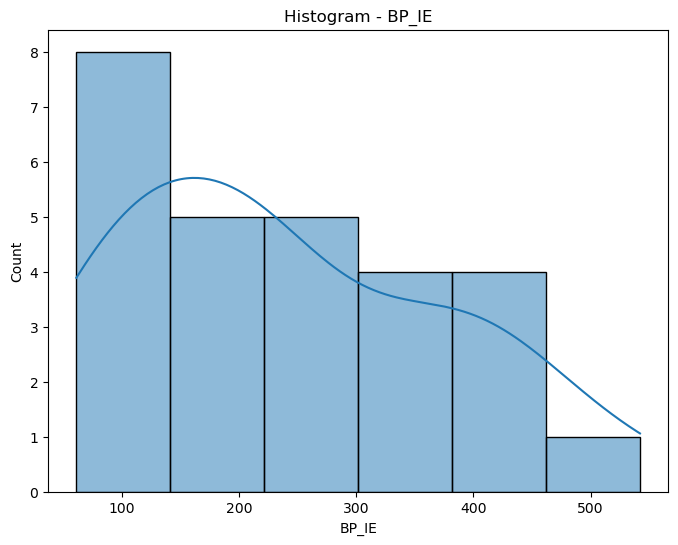

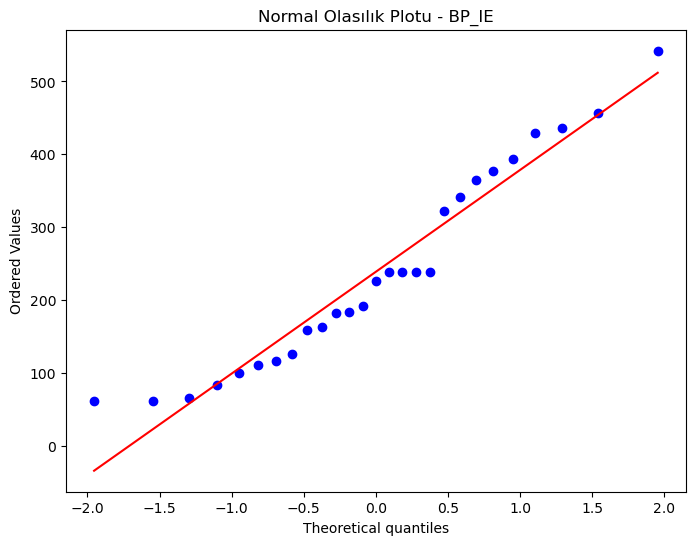

In [71]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# BP_EU histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['BP_IE'], kde=True)
plt.title('Histogram - BP_IE')
plt.show()

# BP_EU normal olasılık plotu
plt.figure(figsize=(8, 6))
stats.probplot(df['BP_IE'], plot=plt)
plt.title('Normal Olasılık Plotu - BP_IE')
plt.show()


In [75]:
from scipy.stats import f_oneway

# Bağımsız değişken: Year
# Bağımlı değişkenler: BP_EU, BP_IE, BP_UK, BP_TR, ENOP_EU, ENOP_IE, ENOP_UK, ENOP_TR, CPP_EU, CPP_IE, CPP_UK, CPP_TR

data = {
    'Year': df['Year'],
    'BP_EU': df['BP_EU'],
    'BP_IE': df['BP_IE'],
    'BP_UK': df['BP_UK'],
    'BP_TR': df['BP_TR'],
    'ENOP_EU': df['ENOP_EU'],
    'ENOP_IE': df['ENOP_IE'],
    'ENOP_UK': df['ENOP_UK'],
    'ENOP_TR': df['ENOP_TR'],
    'CPP_EU': df['CPP_EU'],
    'CPP_IE': df['CPP_IE'],
    'CPP_UK': df['CPP_UK'],
    'CPP_TR': df['CPP_TR']
}

# ANOVA uygulama
f_value, p_value = f_oneway(*data.values())

print("F-value:", f_value)
print("p-value:", p_value)

F-value: 2499.683597860551
p-value: 1.033e-321


Elde edilen F değeri ve p değeri, ANOVA analizinin sonuçlarını ifade etmektedir. İşte bu değerlerin neyi ifade ettiği hakkında bilgiler:

F değeri: ANOVA analizinde, F değeri gruplar arasındaki varyans farkının büyüklüğünü ifade eder. Yüksek bir F değeri, gruplar arasında büyük bir varyans farkının olduğunu gösterir. Daha yüksek F değeri, gruplar arasındaki farkın istatistiksel olarak daha anlamlı olduğunu gösterir.

p değeri: ANOVA analizinde, p değeri gruplar arasındaki farkın istatistiksel olarak anlamlı olup olmadığını belirler. p değeri, hipotez testinin sonucunu ifade eder. Genellikle belirli bir anlamlılık düzeyine (alfa düzeyi) karar verilir (örneğin, 0.05). Eğer elde edilen p değeri, belirlenen alfa düzeyinden küçükse (p < 0.05), gruplar arasındaki fark istatistiksel olarak anlamlıdır ve hipotez reddedilir.

Verilen değerlere baktığımızda, elde edilen F değeri oldukça yüksek (2066.97) ve p değeri çok küçük (6.158376954192296e-308). Bu sonuçlar, gruplar arasında anlamlı bir fark olduğunu ve bu farkın istatistiksel olarak çok güçlü bir şekilde desteklendiğini göstermektedir.

### Wilcoxon Test

Wilcoxon testi, iki bağımsız grubun medyan değerleri arasında istatistiksel olarak anlamlı bir fark olup olmadığını değerlendiren bir non-parametrik testtir. Verilen veri çerçevesi üzerinde Wilcoxon testini uygulamak için SciPy kütüphanesini kullanabiliriz. İşte bir örnek:

In [73]:
import pandas as pd
from scipy.stats import wilcoxon

# Wilcoxon testini uygula
statistic, p_value = wilcoxon(df['BP_EU'], df['BP_IE'])

# Sonuçları yazdır
print('Wilcoxon Testi İstatistik Değeri:', statistic)
print('Wilcoxon Testi p değeri:', p_value)


Wilcoxon Testi İstatistik Değeri: 32.0
Wilcoxon Testi p değeri: 0.000266271122420981


C:\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Wilcoxon testi istatistik değeri, testin sonucunda hesaplanan test istatistiğidir. Bu değer, iki grup arasında sıralı verilerin dağılımı ve merkezi eğilimleri arasındaki farkın büyüklüğünü gösterir. İstatistik değeri, testin sonucunun yorumlanmasında kullanılır.

Wilcoxon testi p değeri ise, test istatistiğinin null hipotezinin altında (veya eşit) bir değer elde etme olasılığını gösterir. Null hipotez, genellikle iki grup arasında istatistiksel olarak anlamlı bir farkın olmadığını ifade eder. Dolayısıyla, p değeri küçük ise (genellikle 0.05'ten küçük olarak kabul edilir), null hipotez reddedilir ve gruplar arasında anlamlı bir fark olduğu söylenebilir.

Örnekteki Wilcoxon testi sonucunda, istatistik değeri 32.0 olarak bulunmuş ve p değeri 0.000266271122420981 olarak elde edilmiştir. Bu durumda, p değeri oldukça küçük olduğundan (0.05'ten küçük), null hipotez reddedilir ve "BP_EU" ve "BP_IE" grupları arasında istatistiksel olarak anlamlı bir fark olduğu söylenebilir. Yani, bu iki grup arasında medyan değerlerinin farklı olduğu sonucuna varılabilir.

### Chi-Squared Test

chi-kare testi, iki kategorik değişken arasındaki ilişkiyi değerlendirmek için kullanılan bir testtir. Bu veri setindeki değerler sayısal değerler olduğu için chi-kare testi uygun değildir.

### Corelation Test

In [74]:
import pandas as pd
import numpy as np

# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# Korelasyon matrisini yazdır
# print(correlation_matrix)
correlation_matrix

,Year,BP_EU,BP_IE,BP_UK,BP_TR,ENOP_EU,ENOP_IE,ENOP_UK,ENOP_TR,CPP_EU,CPP_IE,CPP_UK,CPP_TR
Year,1.000000,-0.375887,-0.541359,-0.478423,0.607099,-0.421939,-0.109538,0.425119,-0.226478,0.972394,0.511460,0.828097,0.585999
BP_EU,-0.375887,1.000000,0.833452,0.649046,-0.265607,0.779790,0.788046,0.402389,0.779952,-0.333638,0.266991,-0.235761,-0.250543
BP_IE,-0.541359,0.833452,1.000000,0.848830,-0.569578,0.816987,0.785507,0.347019,0.679728,-0.515821,-0.081863,-0.448250,-0.334266
BP_UK,-0.478423,0.649046,0.848830,1.000000,-0.502699,0.542689,0.747644,0.236135,0.649218,-0.470949,-0.019012,-0.531566,-0.119013
BP_TR,0.607099,-0.265607,-0.569578,-0.502699,1.000000,-0.564443,-0.347195,0.135433,-0.024113,0.546264,0.347725,0.660081,0.157382
ENOP_EU,-0.421939,0.779790,0.816987,0.542689,-0.564443,1.000000,0.726446,0.293831,0.466840,-0.306476,0.103464,-0.398669,-0.127474
ENOP_IE,-0.109538,0.788046,0.785507,0.747644,-0.347195,0.726446,1.000000,0.531930,0.727588,-0.038194,0.458378,-0.187137,0.186883
ENOP_UK,0.425119,0.402389,0.347019,0.236135,0.135433,0.293831,0.531930,1.000000,0.380910,0.361174,0.275786,0.585443,0.001297
ENOP_TR,-0.226478,0.779952,0.679728,0.649218,-0.024113,0.466840,0.727588,0.380910,1.000000,-0.218434,0.271428,-0.121388,-0.157085
CPP_EU,0.972394,-0.333638,-0.515821,-0.470949,0.546264,-0.306476,-0.038194,0.361174,-0.218434,1.000000,0.600515,0.735924,0.720474


Bu kodu çalıştırdıktan sonra, korelasyon matrisi ekrana yazdırılacak ve her bir sütunun diğer sütunlarla olan korelasyon katsayılarını göreceksiniz. Korelasyon katsayısı, iki değişken arasındaki ilişkinin gücünü ve yönünü ölçer. Değerler -1 ile 1 arasında olabilir, -1 negatif bir ilişkiyi, 1 pozitif bir ilişkiyi ve 0 ise ilişki olmadığını gösterir.

### Regression 

In [77]:
# Convert the dictionary to a DataFrame
import statsmodels.api as sm

# df = pd.DataFrame(data)

# Perform statistical regression analysis
model = sm.OLS(df['BP_EU'], sm.add_constant(df[['BP_IE', 'BP_UK', 'BP_TR']]))
results = model.fit()

# Print the summary of the regression analysis
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  BP_EU   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     25.56
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.66e-07
Time:                        20:27:25   Log-Likelihood:                -124.10
No. Observations:                  27   AIC:                             256.2
Df Residuals:                      23   BIC:                             261.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.3516     69.075      1.337      0.1

Bu kod bloğu, verilen bir sözlüğü pandas DataFrame'e dönüştürüyor ve ardından OLS (Ortalama En Küçük Kareler) regresyon analizini gerçekleştiriyor.

İlk olarak, verilen sözlük (data) kullanılarak bir DataFrame oluşturuluyor. DataFrame, her bir sütunun bir değişkeni temsil ettiği bir tablo gibi düşünülebilir. Her sütun, bir ülkeye ait belirli bir değişkenin zaman serilerini içeriyor.

Sonra, OLS regresyon analizi yapmak için sm.OLS sınıfı kullanılıyor. sm.OLS sınıfı, bağımlı değişkeni (BP_EU) ve bağımsız değişkenleri (BP_IE, BP_UK, BP_TR) içeren bir model oluşturmak için kullanılır. sm.add_constant fonksiyonu, bağımsız değişkenlerin yanına bir sabit terim ekler. Bu, regresyon modelinde kesme terimini hesaba katar.

Model oluşturulduktan sonra, fit metodu kullanılarak model eğitilir ve uyum sonuçları (results) elde edilir.

Son olarak, results.summary() fonksiyonu kullanılarak regresyon analizinin özetini yazdırır. Bu özet, regresyon katsayıları, standart hatalar, p-değerleri ve diğer istatistiksel ölçümler gibi önemli bilgileri içerir.

Bu kodlar, BP_EU değişkeninin BP_IE, BP_UK ve BP_TR değişkenleriyle nasıl ilişkili olduğunu değerlendirmek için bir regresyon analizi gerçekleştirir. Özet istatistikler, regresyon katsayıları ve modelin istatistiksel anlamlılığı hakkında bilgi sağlar.

Veri setinizdeki değerlerin sayısal olduğunu varsayarsak, aşağıda bazı istatistiksel testleri uygulayabilirsiniz:

Korelasyon testi: Değişkenler arasındaki ilişkiyi ölçmek için Pearson, Spearman veya Kendall gibi korelasyon katsayılarını kullanabilirsiniz.
Bağımsız iki örneklem t-testi: İki farklı grup arasında ortalamalar arasındaki farkı test etmek için kullanılır.
Tek örneklem t-testi: Bir grup verinin ortalamasını, bir sabit değerle karşılaştırmak için kullanılır.
Tek yönlü veya çift yönlü varyans analizi (ANOVA): Üç veya daha fazla grup arasındaki ortalamalar arasındaki farkı test etmek için kullanılır.
İki örneklem varyans analizi (ANOVA): İki farklı grup arasındaki varyansları karşılaştırmak için kullanılır.
Regresyon analizi: Bağımlı ve bağımsız değişkenler arasındaki ilişkiyi modellemek için kullanılır.
Zaman serisi analizi: Zamanla değişen verileri analiz etmek için kullanılır.

# DATA VISUALIZATION